<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Lift_and_Drag_Calculation_on_NACA_0012_Airfoil_using_Panel_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

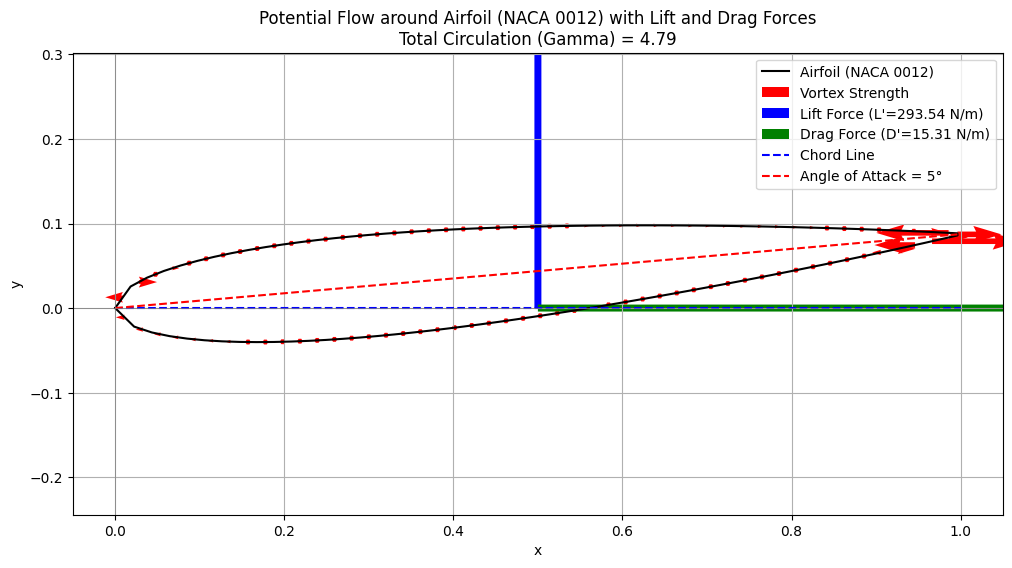

Positive angle of attack 5°:
Lift per unit length: 293.5387207233497 N/m
Drag per unit length: 15.3125 N/m
Total circulation (Gamma): 4.792468909768974


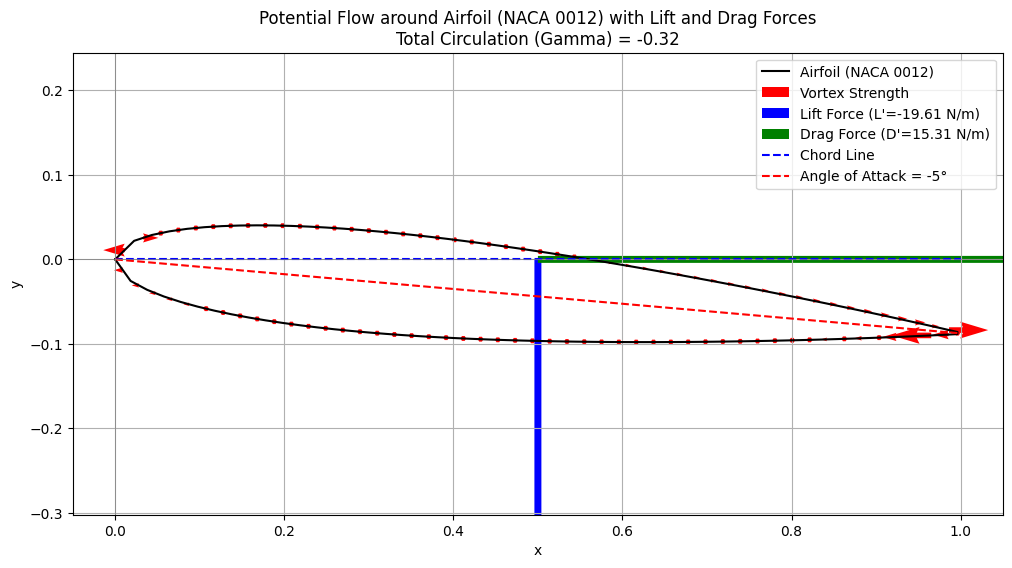

Negative angle of attack -5°:
Lift per unit length: -19.609623538160168 N/m
Drag per unit length: 15.3125 N/m
Total circulation (Gamma): -0.32015711899037


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the geometry of a simple airfoil (NACA 0012 for example)
def naca0012(x):
    t = 0.12
    return 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1015 * x**4)

# Define the rotation matrix for angle of attack
def rotate(x, y, angle):
    radians = np.deg2rad(angle)
    x_rot = x * np.cos(radians) - y * np.sin(radians)
    y_rot = x * np.sin(radians) + y * np.cos(radians)
    return x_rot, y_rot

# Discretize the airfoil surface into panels and rotate for angle of attack
def define_panels(N, angle):
    x = np.linspace(0, 1, N)
    y_upper = naca0012(x)
    y_lower = -naca0012(x)
    x = np.concatenate([x, x[::-1]])
    y = np.concatenate([y_upper, y_lower[::-1]])
    x, y = rotate(x, y, angle)
    return x, y

# Solve for potential flow using panel method
def panel_method(x, y):
    N = len(x) - 1  # Number of panels
    xc = (x[:-1] + x[1:]) / 2  # Control points
    yc = (y[:-1] + y[1:]) / 2

    A = np.zeros((N, N))
    b = -2 * np.pi * np.ones(N)

    for i in range(N):
        for j in range(N):
            if i == j:
                A[i, j] = 0.5
            else:
                dx = xc[i] - x[j]
                dy = yc[i] - y[j]
                A[i, j] = (1 / (2 * np.pi)) * (dx / (dx**2 + dy**2))

    gamma = np.linalg.solve(A, b)

    return xc, yc, gamma

# Calculate lift and drag forces
def calculate_forces(gamma, rho, V_inf):
    # Calculate total circulation
    Gamma = np.sum(gamma)

    # Kutta-Joukowski theorem for lift per unit length
    L_per_length = rho * V_inf * Gamma

    # Estimate drag using a drag coefficient (simplified model)
    C_d = 0.01  # Assumed drag coefficient for the example
    D_per_length = 0.5 * rho * V_inf**2 * C_d

    return L_per_length, D_per_length, Gamma

# Plot the airfoil and flow
def plot_airfoil_flow(x, y, xc, yc, gamma, L_per_length, D_per_length, angle, Gamma):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'k-', label='Airfoil (NACA 0012)')
    plt.quiver(xc, yc, gamma, np.zeros_like(gamma), scale=50, color='r', label='Vortex Strength')

    # Add lift and drag vectors
    plt.quiver(0.5, 0, 0, L_per_length, angles='xy', scale_units='xy', scale=1, color='b', label=f'Lift Force (L\'={L_per_length:.2f} N/m)')
    plt.quiver(0.5, 0, D_per_length, 0, angles='xy', scale_units='xy', scale=1, color='g', label=f'Drag Force (D\'={D_per_length:.2f} N/m)')

    # Plot the chord line to show angle of attack
    plt.plot([0, 1], [0, 0], 'b--', label='Chord Line')
    x_chord, y_chord = rotate(np.array([0, 1]), np.array([0, 0]), angle)  # Correct the angle for airflow from the left
    plt.plot(x_chord, y_chord, 'r--', label=f'Angle of Attack = {angle}°')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Potential Flow around Airfoil (NACA 0012) with Lift and Drag Forces\nTotal Circulation (Gamma) = {Gamma:.2f}')
    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.show()

# Main function to run the notebook steps
def main():
    N = 50  # Number of panels
    angle_of_attack_positive = 5  # Positive angle of attack in degrees
    angle_of_attack_negative = -5  # Negative angle of attack in degrees

    # Positive angle of attack
    x_pos, y_pos = define_panels(N, angle_of_attack_positive)
    xc_pos, yc_pos, gamma_pos = panel_method(x_pos, y_pos)
    rho = 1.225  # Density of air in kg/m^3
    V_inf = 50  # Freestream velocity in m/s
    L_per_length_pos, D_per_length_pos, Gamma_pos = calculate_forces(gamma_pos, rho, V_inf)
    plot_airfoil_flow(x_pos, y_pos, xc_pos, yc_pos, gamma_pos, L_per_length_pos, D_per_length_pos, angle_of_attack_positive, Gamma_pos)

    print(f'Positive angle of attack {angle_of_attack_positive}°:')
    print(f'Lift per unit length: {L_per_length_pos} N/m')
    print(f'Drag per unit length: {D_per_length_pos} N/m')
    print(f'Total circulation (Gamma): {Gamma_pos}')

    # Negative angle of attack
    x_neg, y_neg = define_panels(N, angle_of_attack_negative)
    xc_neg, yc_neg, gamma_neg = panel_method(x_neg, y_neg)
    L_per_length_neg, D_per_length_neg, Gamma_neg = calculate_forces(gamma_neg, rho, V_inf)
    plot_airfoil_flow(x_neg, y_neg, xc_neg, yc_neg, gamma_neg, L_per_length_neg, D_per_length_neg, angle_of_attack_negative, Gamma_neg)

    print(f'Negative angle of attack {angle_of_attack_negative}°:')
    print(f'Lift per unit length: {L_per_length_neg} N/m')
    print(f'Drag per unit length: {D_per_length_neg} N/m')
    print(f'Total circulation (Gamma): {Gamma_neg}')

if __name__ == "__main__":
    main()
